In [405]:
from pandas import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [406]:
parser = lambda date: pd.datetime.strptime(date, '%d/%m/%Y')
data = read_csv("coffeeDonors.csv", parse_dates=[2], date_parser=parser)
data = data.sort_values(by = "Date")
data.head()

,Name,Amount,Date
0,Dylan,500,2014-09-16
1,Joe,227,2014-10-10
2,William,227,2014-10-20
3,Joe,227,2014-10-23
4,Peter,500,2014-10-25


In [407]:
int((datetime.now() - data["Date"][1]).days)

515

In [408]:
data[data.Name == 'William']

,Name,Amount,Date
2,William,227,2014-10-20
9,William,450,2014-12-08
17,William,450,2015-01-28
25,William,450,2015-03-09
29,William,227,2015-04-03
46,William,554,2015-07-01


In [409]:
data["Month"] = data["Date"].dt.month

In [410]:
data.head()

,Name,Amount,Date,Month
0,Dylan,500,2014-09-16,9
1,Joe,227,2014-10-10,10
2,William,227,2014-10-20,10
3,Joe,227,2014-10-23,10
4,Peter,500,2014-10-25,10


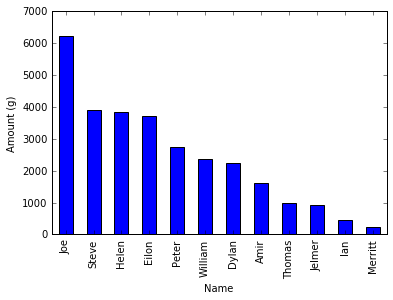

In [421]:
groupedDataByName = (data.drop("Month", axis=1)).groupby("Name")
groupDataByNameSorted = groupedDataByName.sum().sort_values(by = "Amount", ascending = False)
groupDataByNameSorted.Amount.plot(kind='bar')
groupDataByNameSorted.head()
plt.ylabel('Amount (g)')
plt.savefig('totalAmount_vs_name.pdf')

In [412]:
consumptionData = read_csv("coffeeConsumption.csv").set_index("Name")
consumptionData["paidPerKg"] = np.round(consumptionData["paid_pounds"]/consumptionData["perWeight_g"] * 1000)
consumptionData["usedCoffeeFor_days"] = consumptionData["beenHereFor_months"]*30
consumptionData.loc[consumptionData["usedCoffeeFor_days"] > int((datetime.now() - data["Date"][1]).days),\
                    "usedCoffeeFor_days"] = int((datetime.now() - data["Date"][1]).days)
consumptionData["amountOfCoffeeUsed_cups"] = np.round(consumptionData["consumption_cups"] * \
                    consumptionData["usedCoffeeFor_days"] * 4/7)
consumptionData.head()

,beenHereFor_months,consumption_cups,paid_pounds,perWeight_g,paidPerKg,usedCoffeeFor_days,amountOfCoffeeUsed_cups
Name,,,,,,,
Dylan,32,1.5,3,227,13,515,441
Jelmer,6,1.0,13,1000,13,180,103
Eilon,29,1.5,18,1000,18,515,441
William,17,0.5,NaN,NaN,NaN,510,146
Amir,15,0.5,3,227,13,450,129


,Amount,beenHereFor_months,consumption_cups,paid_pounds,perWeight_g,paidPerKg,usedCoffeeFor_days,amountOfCoffeeUsed_cups,paidTotal_pounds
Name,,,,,,,,,
Amir,1618,15,0.5,3,227,13,450,129,21
Dylan,2227,32,1.5,3,227,13,515,441,29
Eilon,3708,29,1.5,18,1000,18,515,441,67
Helen,3850,8,2.0,3,227,13,240,274,50
Ian,450,100,0.0,NaN,NaN,NaN,515,0,NaN
Jelmer,908,6,1.0,13,1000,13,180,103,12
Joe,6209,20,2.0,3,227,13,515,589,81
Merritt,227,48,0.0,NaN,NaN,NaN,515,0,NaN
Peter,2727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


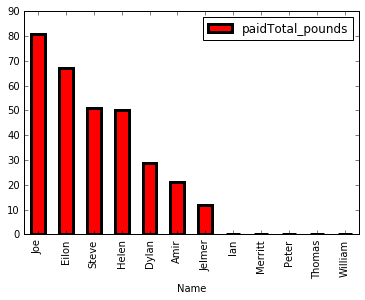

In [413]:
allData = pd.merge(groupDataByNameSorted, consumptionData, how="outer", left_index=True, right_index=True)
allData["paidTotal_pounds"] = np.round(allData["Amount"]/1000 * allData["paidPerKg"])
allData.sort_values(by="paidTotal_pounds", ascending=False).plot(y = "paidTotal_pounds", kind="bar", color="r", lw=3)
allData

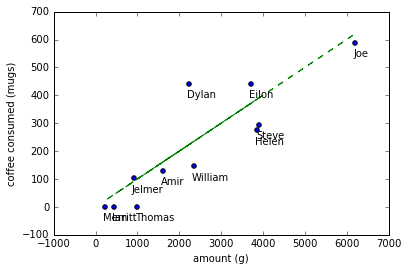

In [419]:
labels = allData.index.values
fig = allData.plot(x="Amount", y="amountOfCoffeeUsed_cups", kind="scatter")
fig.plot(allData["Amount"], allData["Amount"]/10, 'g--')
for x, y, lab in zip(allData["Amount"], allData["amountOfCoffeeUsed_cups"], labels):
        fig.annotate(lab, xy=(x, y), xytext=(x-50,y-50))
plt.ylabel('coffee consumed (mugs)')
plt.xlabel('amount (g)')
plt.savefig('consumption_vs_amountBought.pdf')

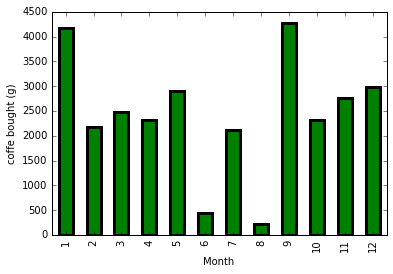

In [415]:
groupedByMonth = data.groupby("Month")
groupedbyMonthSorted = groupedByMonth.sum()
groupedbyMonthSorted.Amount.plot(kind="bar", color="g", lw = 3)
plt.ylabel("coffe bought (g)")
plt.savefig("vsMonths.pdf")

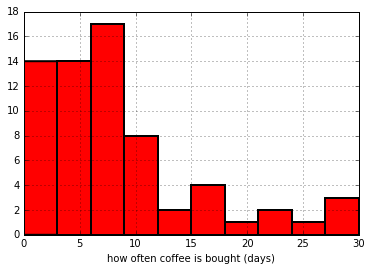

In [420]:
d1 = data["Date"][1:].reset_index(drop=True)
d2 = data["Date"][:-1].reset_index(drop=True)
((d1-d2).dt.days).hist(color="r", lw=2)
plt.xlabel('how often coffee is bought (days)')
plt.savefig('frequency.pdf')

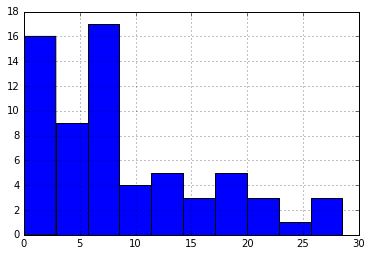

In [417]:
a1 = data["Amount"][:-1]
(((d1-d2).dt.days)/a1*np.mean(a1)).hist()